# BMW car pricing

## Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv(r'C:\Users\Jordi Grau\Desktop\Data Science Project\BMW_Regression-1\bmw_pricing_v2.csv', sep=',')

In [3]:
df

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


# Functions

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Columns: 18 entries, marca to fecha_venta
dtypes: bool(1), float64(3), object(14)
memory usage: 648.1+ KB


In [6]:
description = df.describe(include='all').T

In [7]:
description.to_excel('df_description.xlsx')

# Analisis del Target

In [8]:
TARGET = 'precio'

In [9]:
df[TARGET].describe()

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<AxesSubplot:ylabel='precio'>

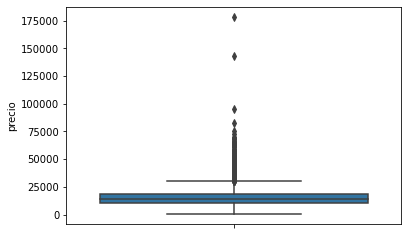

In [13]:
sns.boxplot(data = df, y =TARGET)

In [19]:
df['TARGET_LN'] = df[TARGET].apply(lambda x: np.log(x))

<AxesSubplot:ylabel='TARGET_LN'>

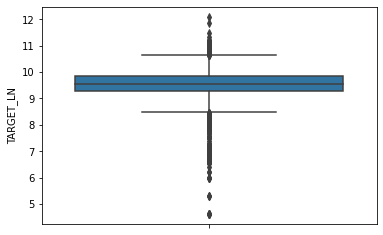

In [20]:
sns.boxplot(data = df, y = 'TARGET_LN')

<AxesSubplot:xlabel='fecha_venta', ylabel='TARGET_LN'>

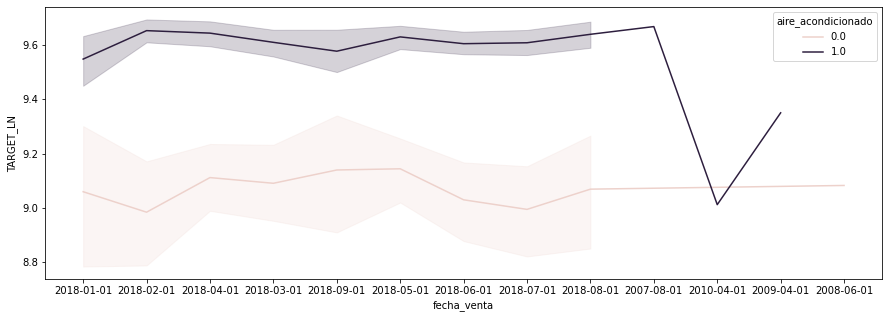

In [32]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = df, x = 'fecha_venta', y = 'TARGET_LN', hue = 'aire_acondicionado') # el precio se ve incrementado en coches con aire acondicionado

<AxesSubplot:xlabel='fecha_venta', ylabel='TARGET_LN'>

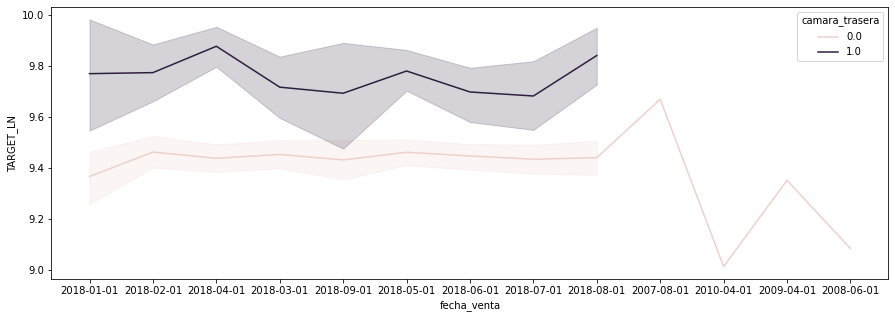

In [33]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = df, x = 'fecha_venta', y = 'TARGET_LN', hue = 'camara_trasera') # el precio se ve incrementado en coches con camara trasera

<AxesSubplot:xlabel='fecha_venta', ylabel='TARGET_LN'>

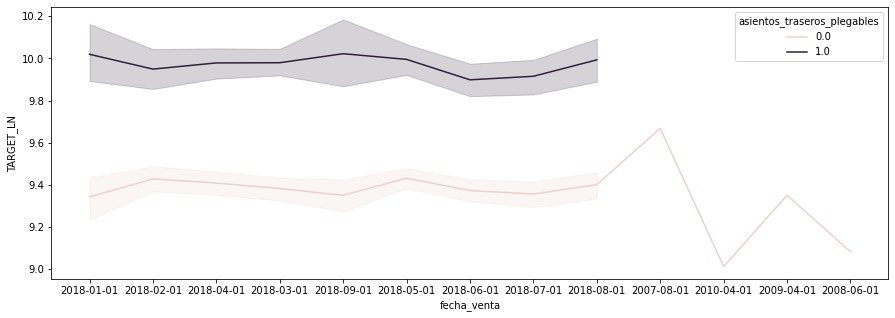

In [34]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = df, x = 'fecha_venta', y = 'TARGET_LN', hue = 'asientos_traseros_plegables') # el precio se ve incrementado en coches con asientos traserosb

<AxesSubplot:xlabel='fecha_venta', ylabel='TARGET_LN'>

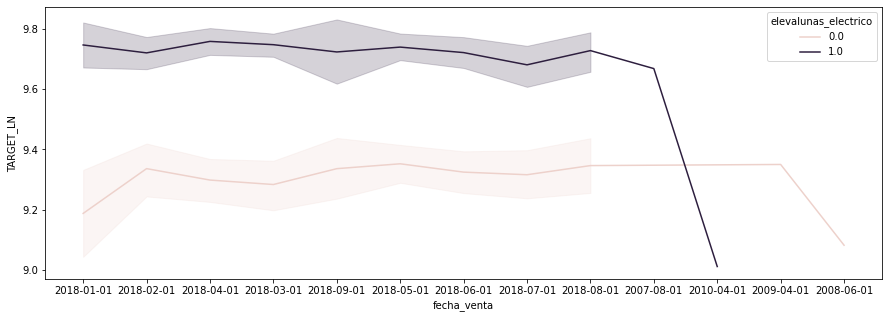

In [37]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = df, x = 'fecha_venta', y = 'TARGET_LN', hue = 'elevalunas_electrico') # el precio se ve incrementado en coches con elevalunas_electrico hasta e

# Data Understanding

### Marca

In [15]:
df['marca'].value_counts(dropna = True)

BMW    4841
Name: marca, dtype: int64

In [16]:
df.drop('marca', axis = 1, inplace = True) # no tiene varianza

### Modelo

In [19]:
df['modelo'].value_counts(dropna = True)

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [23]:
df[df['modelo'].value_counts(dropna = True)<6]

C:\Users\JORDIG~1\AppData\Local\Temp/ipykernel_16692/1417326671.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['modelo'].value_counts(dropna = True)<6]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).